# Car Model analyze using k-means clustering algorithm

## Step 0: Install and load Python libraries

Import all the relevant Python libraries required to conduct K-Means clustering

In [1]:
# Importing required modules


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Step 1: Load the dataset and Explore the data

1. Load the <font color="red">mtcars.csv</font> dataset into a dataframe df

In [2]:
# loading the data
df  = pd.read_csv("mtcars.csv")

2. Study the dataset by sing the usual Python/pandas functions for aa dataset

        2a. Describe what you see based on the functions used

In [3]:
# visualize sample data in table
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
# Summary
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
# checking the missing value
df.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

        Note:- The first columns contains characters 
            (non-numeric) data

In [9]:
# The first colomn is string data type
df.dtypes

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object

3. Create a new dataframe called <font color='red'>cars</font> to build numeric data only

In [13]:
cars = df.iloc[:,1:]

In [14]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


        Note:- The non-numeric column is droped to prepare the 
            data for k-means

## Step 2: Use k-means algorithm to find clusters in the data

1. First normalize the cars dataset to ensure attributes with large values do not skew the results

        1a. confirm the normalization by showing the 10 top instances 
            in the notebook

2. Next, run the k-means for k=3, k=10, and k=20 store the models in km3, km10, and km20 respectively

        2a. Set the random seed to 42

        2b. For each of the three models, print
            i. The predictions(y_pred) for data
            ii. The cluster centers

3. Use a scatter plot to visualize the cluster **based on mpg and hp in the dataset.**

        3a. For each of the three models (k=3, k=10, and k=20)
            i. Show a different scatter plot including the 
               centroids found above

4. **Which of k=3, k=10, and k=20 provide the best clusters for this given pair of features? Exaplain.**

## Step 3: Finding the optimal k for k-means

1. In the textbook, there is a discussion of the elbow method which makes it possible to pick an optimal value for k.  
an alternate method is to perform a grid search as demonstrated in the follow code snippet:

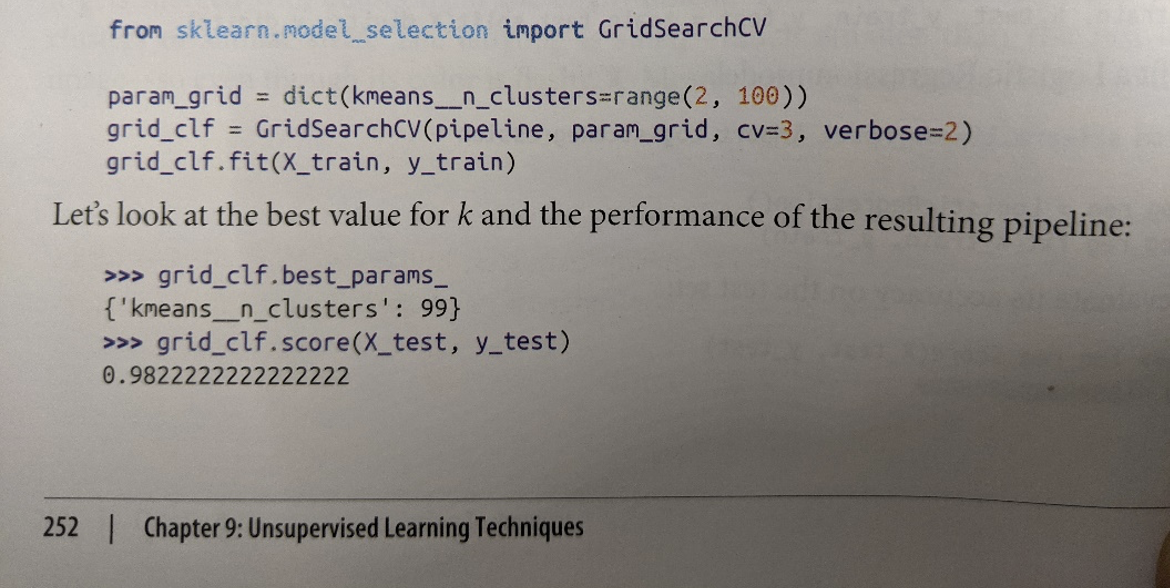


2. Perform a grid search to produce k-means models for k=1 to k=20

        2a. What is the optimal value for k(k-means_n_cluster)?

        2b. What is the model score for the optimal k?

## Step 4: Dimensionality Reduction - Principal Component Analysis:

1. After determining the number of clusters in the <font color='red'>cars</font> dataframe, we are now going to determine the optimal number of features (dimensions) that describes the variance in the dataset using Principal Componet Analysis (PCA).

        1a. Refer to the section in the textbook chapter 8 
            titled Choosing the Right Number of Dimensions

2. Assuming we are selecting an explained variance of 95%, derive the minimum number of dimensions required to preserve 95% of the dataset variance. Hint: use the code example in the textbook 

        2a. What is the dimension d?

        2b. The dataset started with 11 dimensons, is d a significant                 dimensionality reduction?

        2c. What are the benefits of this dimensionality reduction?

        2d. What are possible disadvantages of dimensionlaity 
            reduction?

3. Using the additional code snippet in the textbook (same section), derive the <font color='green'>X_reduced</font> dataframe

        3a. Print it in your notebook

4. Plot the <font color="green">Explained Variance vs Dimensions</font> curve (see figure 8.8 in chapter 8)

        4a. Label the plot with "dimensions" and "Explained Variance".

        4b. Visualize the 0.95 point corresponding to the 
            calculated reduced dimension d